In [1]:
!nvidia-smi

Fri Feb 16 15:56:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/YOLO/TrafficLights

/content/drive/MyDrive/YOLO/TrafficLights


In [7]:
%cd /content/drive/MyDrive/YOLO/TrafficLights

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YOLO/TrafficLights
100% 21.5M/21.5M [00:00<00:00, 123MB/s] 
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [8]:
!ls runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1708099277.72c87b459df1.2424.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch135.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch136.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch137.jpg	weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


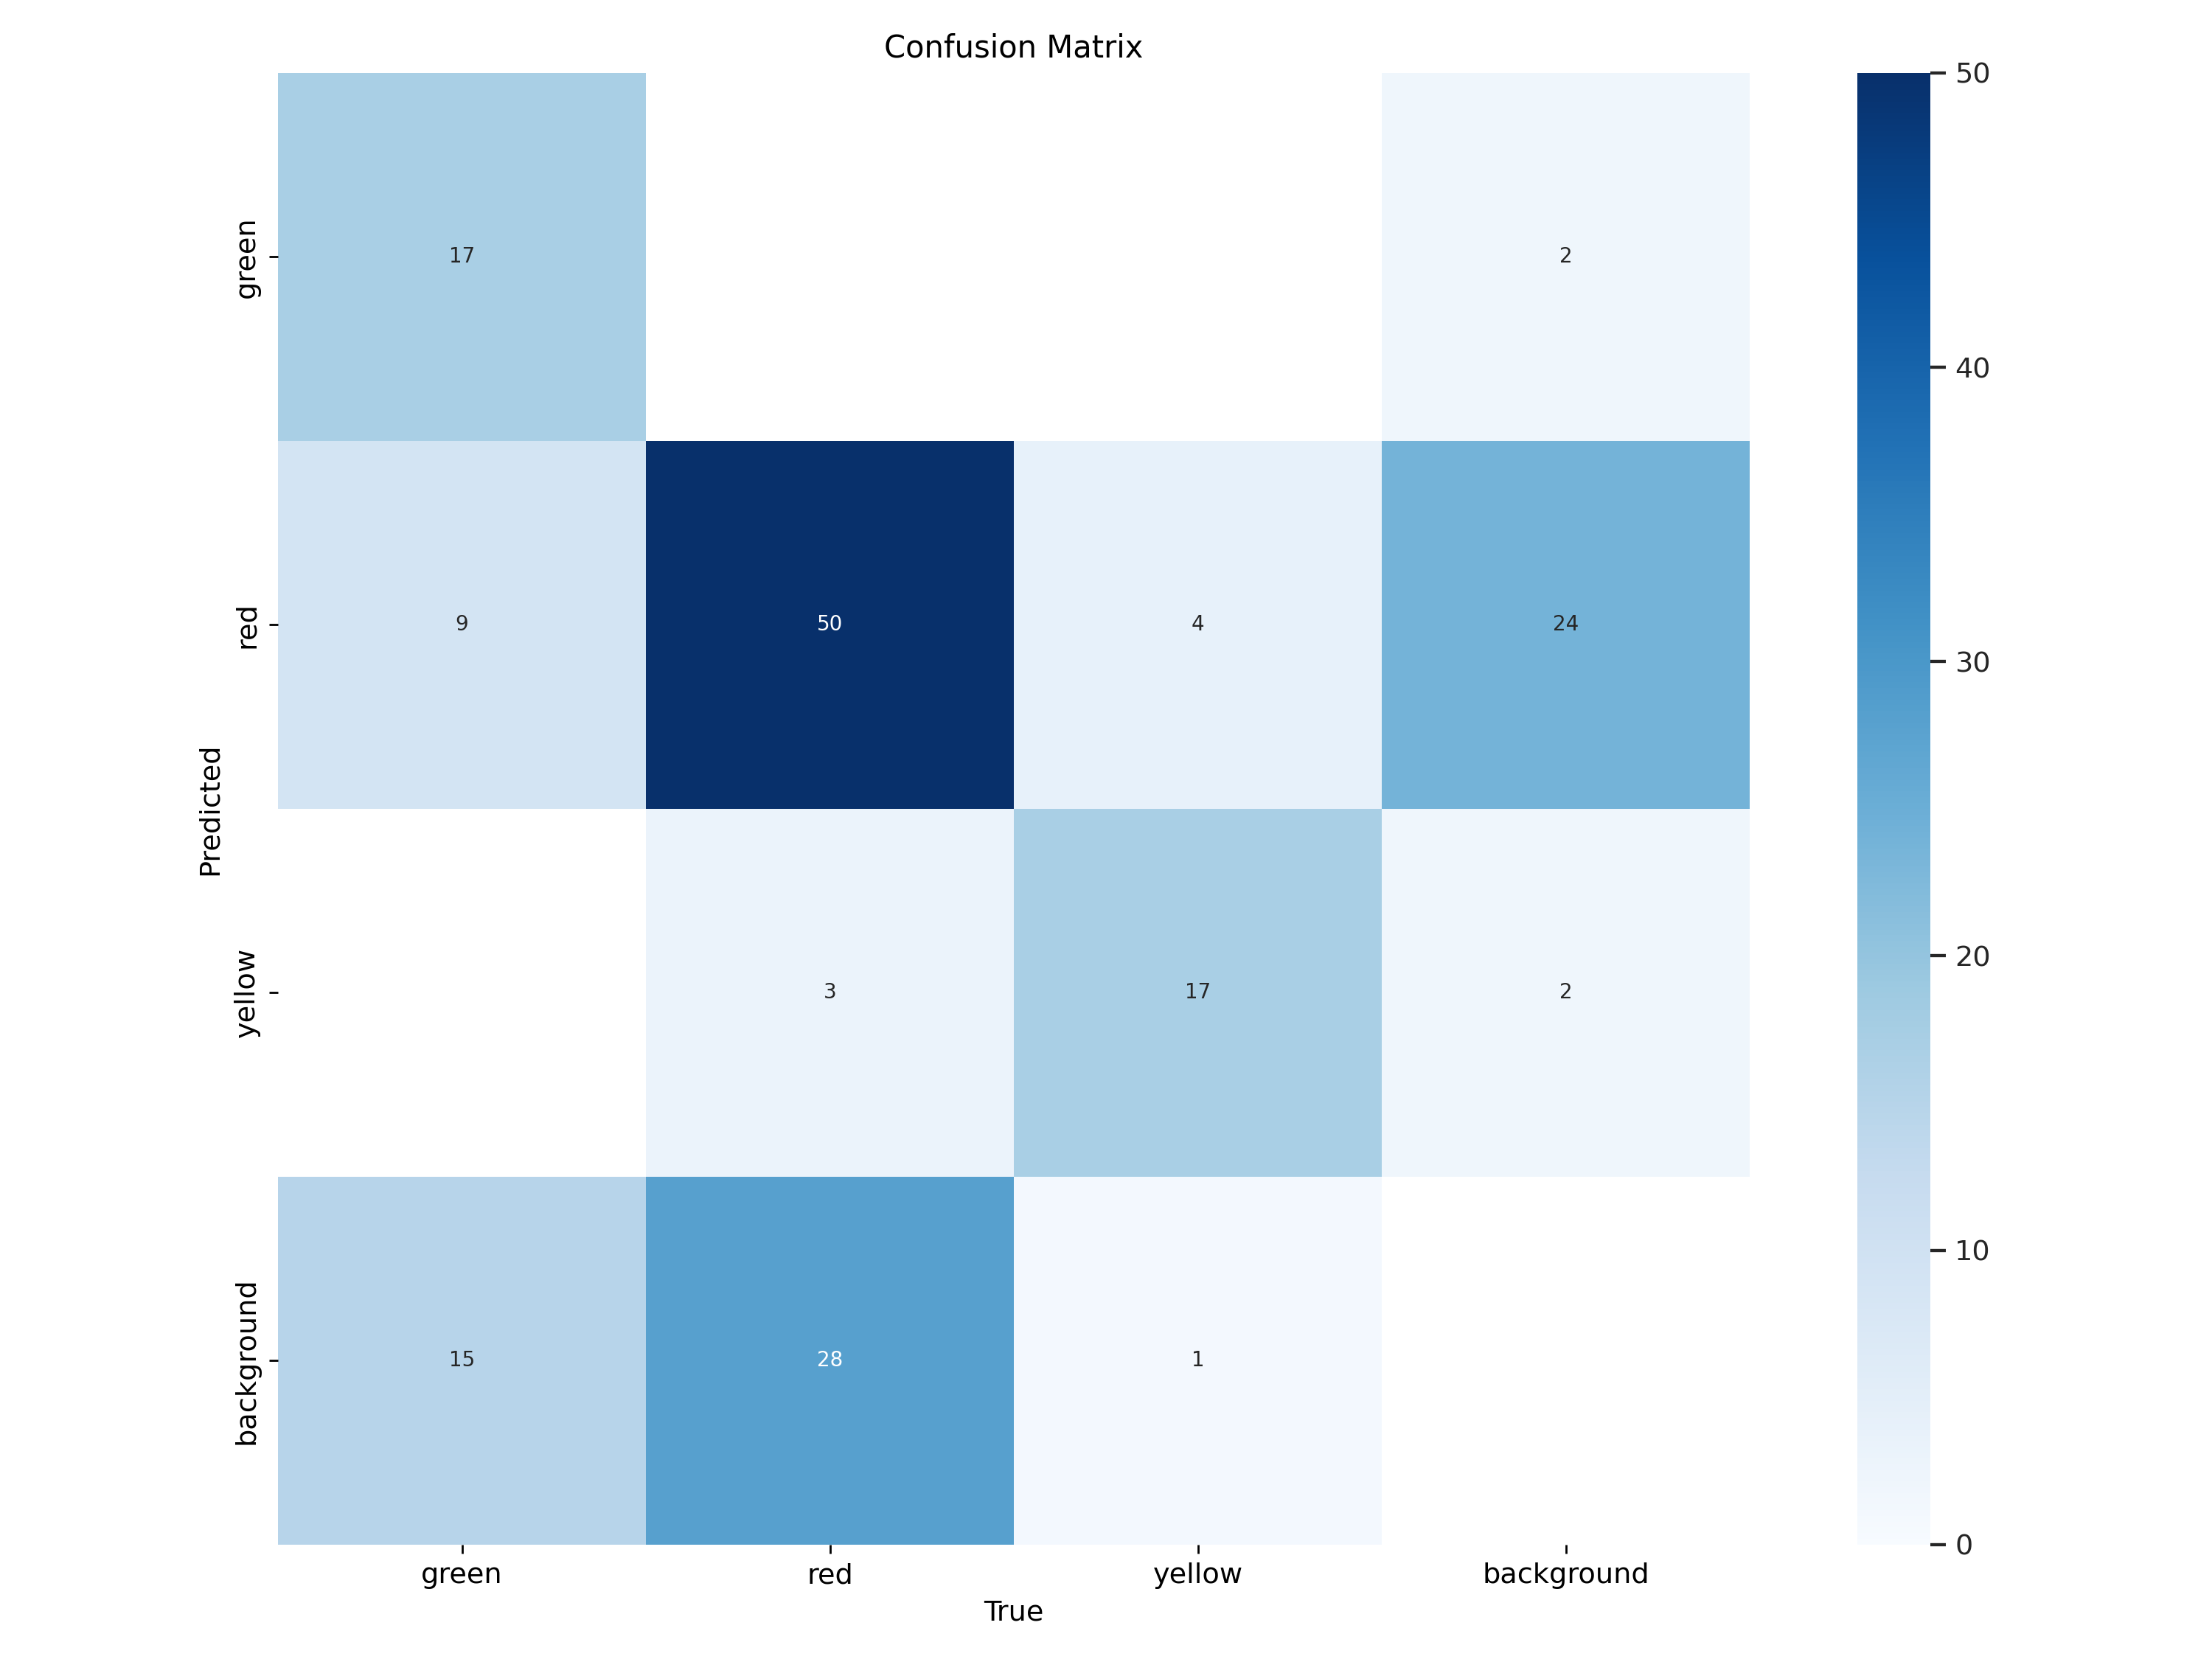

In [9]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

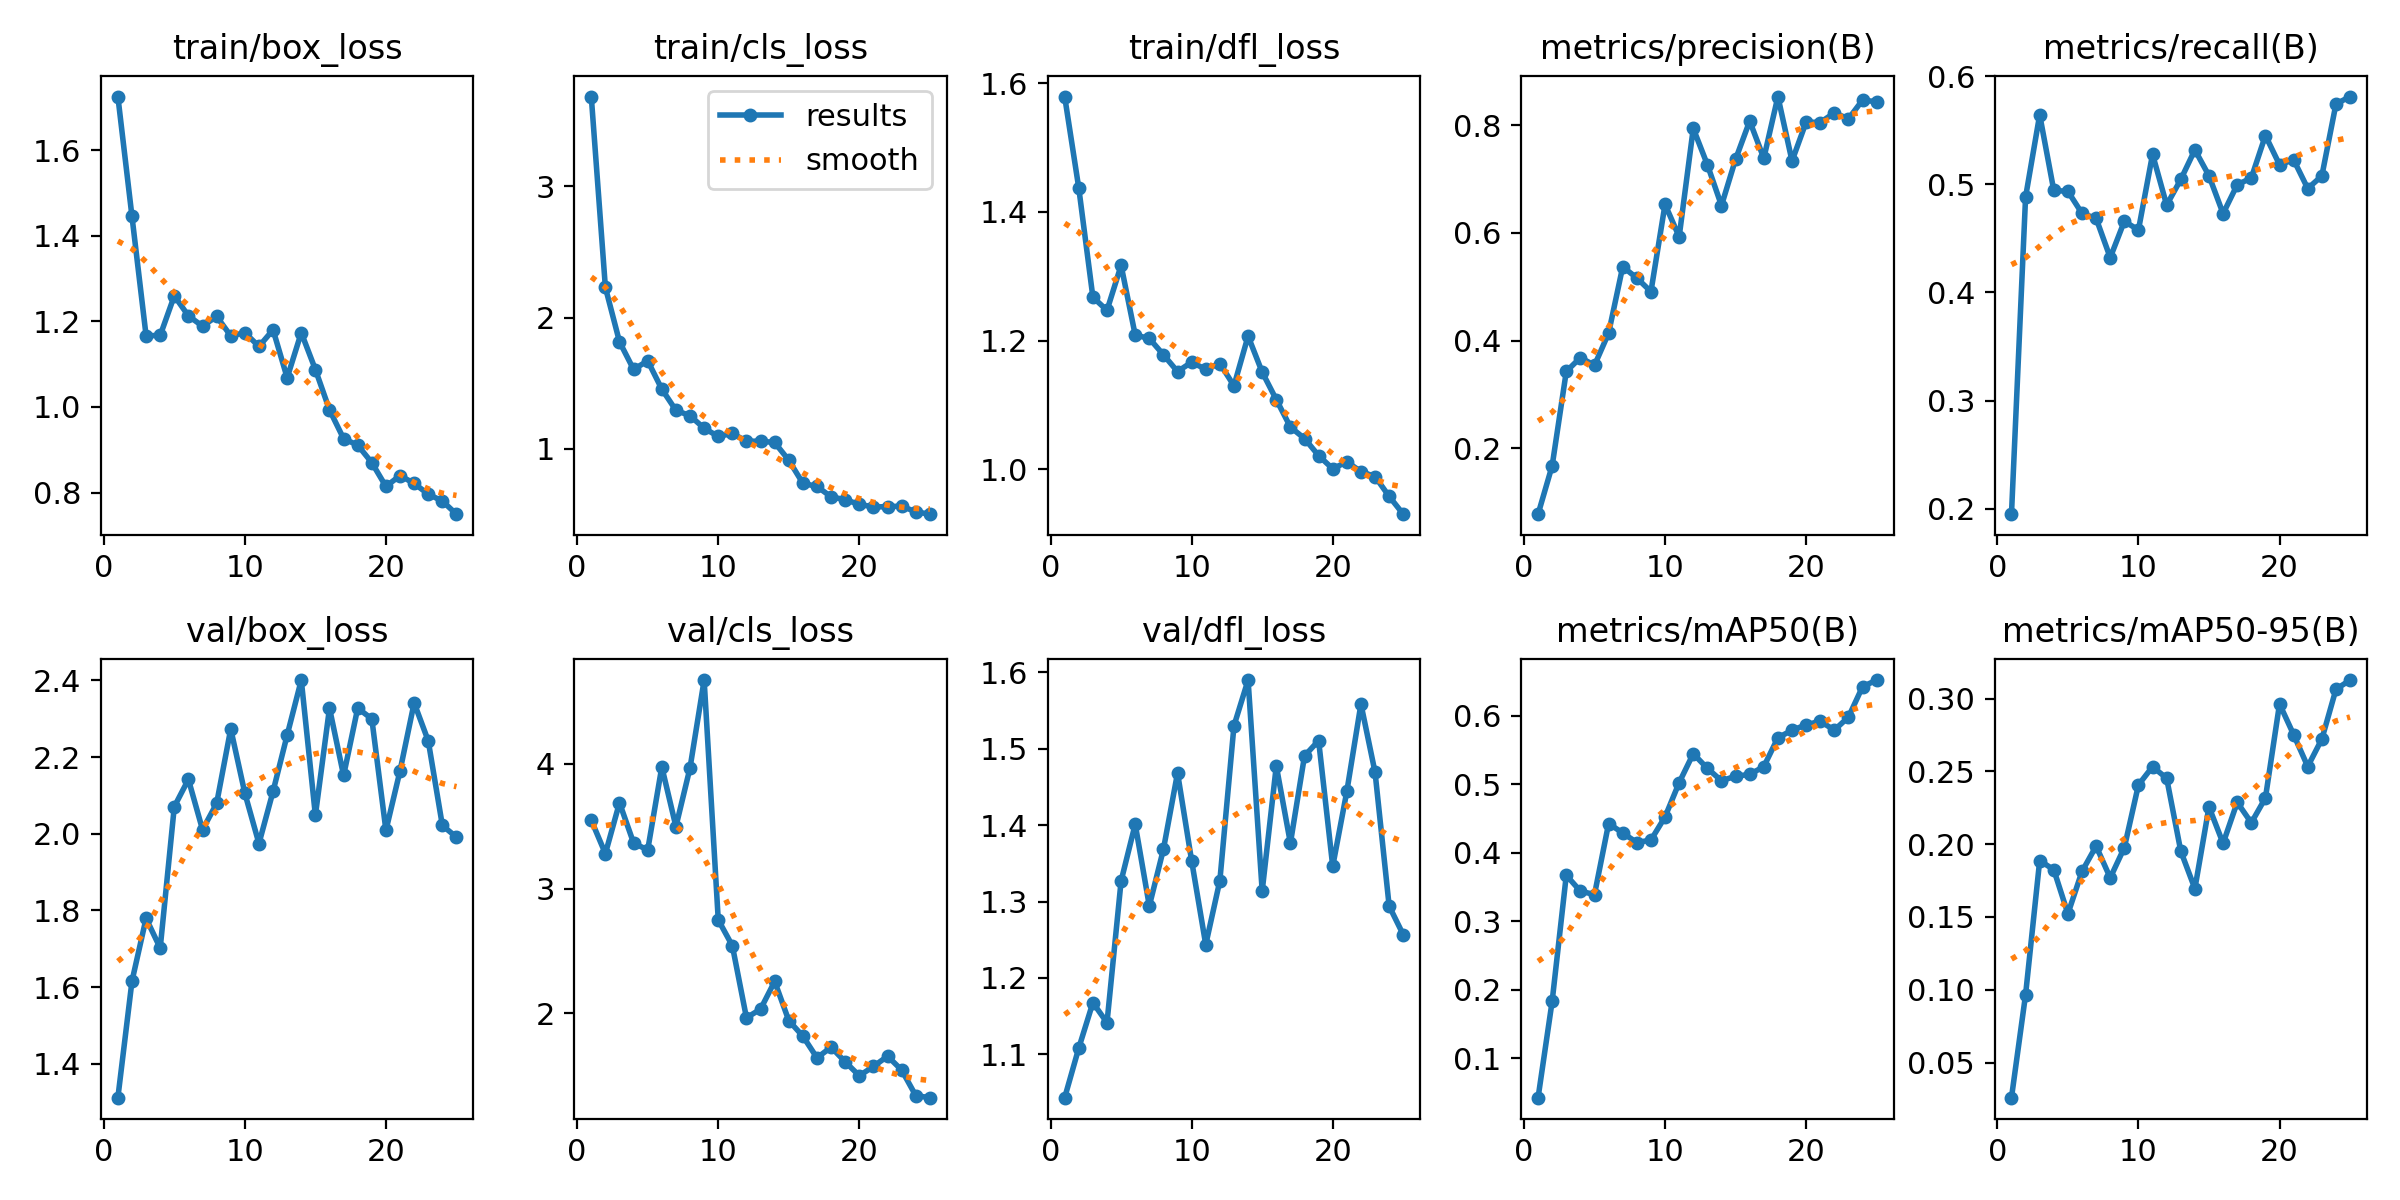

In [10]:
Image(filename='runs/detect/train/results.png', width=600)

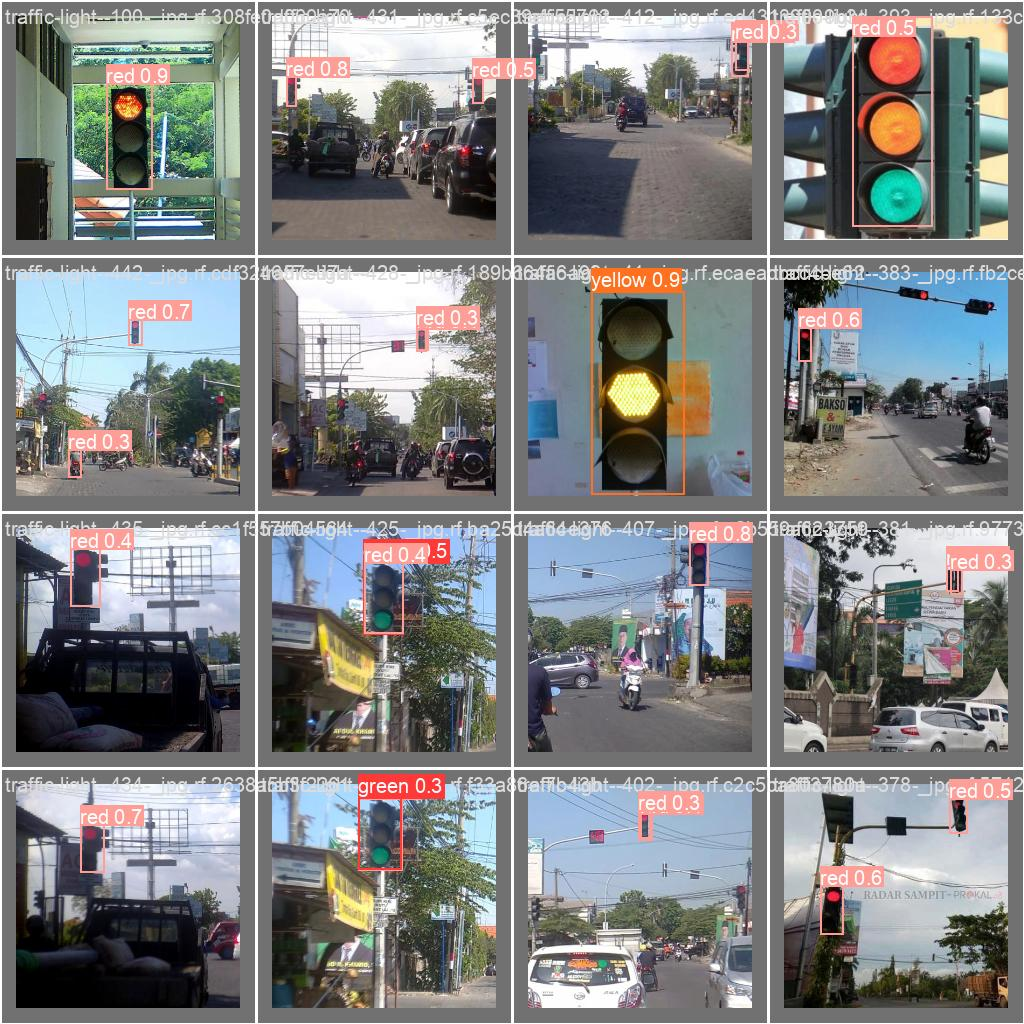

In [11]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO/TrafficLights/data/valid/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.43it/s]
                   all        101        144      0.843      0.581      0.652      0.313
                 green        101         41       0.97       0.39      0.561      0.275
                   red        101         81      0.668       0.58      0.504      0.215
                yellow        101         22      0.892      0.773       0.89      0.449
Speed: 1.2ms preprocess, 9.6ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [13]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/46 /content/drive/MyDrive/YOLO/TrafficLights/data/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg: 224x224 1 yellow, 8.3ms
image 2/46 /content/drive/MyDrive/YOLO/TrafficLights/data/test/images/traffic-light--122-_jpg.rf.63cb9e27085f500f6936833c196db2b8.jpg: 224x224 1 yellow, 7.8ms
image 3/46 /content/drive/MyDrive/YOLO/TrafficLights/data/test/images/traffic-light--128-_jpg.rf.a6747dec0b2c37a87c352aaca5903f4b.jpg: 224x224 1 green, 1 red, 7.6ms
image 4/46 /content/drive/MyDrive/YOLO/TrafficLights/data/test/images/traffic-light--134-_jpg.rf.3d82c581d4357d7e702169962004d148.jpg: 224x224 1 green, 8.1ms
image 5/46 /content/drive/MyDrive/YOLO/TrafficLights/data/test/images/traffic-light--147-_jpg.rf.85beb28881b209b76c01009e108c095d.jpg: 224x224 1 yellow, 7.4ms
image 6/46 /content/drive/MyDri

In [14]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test2/sample.mp4

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 117.5ms
video 1/1 (2/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 18.4ms
video 1/1 (3/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 31.7ms
video 1/1 (4/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 12.9ms
video 1/1 (5/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 10.5ms
video 1/1 (6/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 10.9ms
video 1/1 (7/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 red, 12.3ms
video 1/1 (8/345) /content/drive/MyDrive/YOLO/TrafficLights/data/test2/sample.mp4: 128x224 1 re

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")